In [1]:
from squeezenet_softmax import SqueezeNet

Using TensorFlow backend.


In [2]:
model_squeezenet = SqueezeNet(input_shape=(32,32,3), classes=41, pooling='max')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
len(model_squeezenet.layers)

67

In [4]:
model_squeezenet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 15, 15, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 15, 15, 64)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 7, 7, 64)     0           relu_conv1[0][0]                 
__________________________________________________________________________________________________
fire2/sque

In [35]:
from keras.optimizers import Adam

In [6]:
model_squeezenet.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(lr=0.0001),
    metrics=["acc"],
)

W1023 08:04:44.759437 140512190953280 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1023 08:04:44.768488 140512190953280 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
model_squeezenet.save('SqueezeNet-Model.h5')

In [3]:
model_squeezenet.load_weights('Trained-SqueezeNet-Model-FCS-Type-V2-11-10-2019-V2-1-Epoch 08--Train Acc 1.00--Val Acc 0.85.h5')

In [6]:
from keras.utils import plot_model

In [8]:
plot_model(model_squeezenet, to_file="model.png", show_shapes=True, rankdir="TB")

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model_squeezenet = load_model('Trained-SqueezeNet-Model-DATAV2-Cry-Type.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [5]:
from keras.datasets import cifar10

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
import datetime

In [9]:
start = datetime.datetime.now()
model_squeezenet.fit(x_train, y_train,
              batch_size=32,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)
end = datetime.datetime.now()
total = end - start
print("SqueezeNet Training Time")
print("Time (Seconds): " + str(total.total_seconds()))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 32s 639us/step - loss: 1.9980 - acc: 0.2156 - val_loss: 1.7298 - val_acc: 0.3320
Epoch 2/10
50000/50000 [==============================] - 29s 574us/step - loss: 1.6940 - acc: 0.3429 - val_loss: 1.6024 - val_acc: 0.3935
Epoch 3/10
50000/50000 [==============================] - 29s 578us/step - loss: 1.5202 - acc: 0.4316 - val_loss: 1.4046 - val_acc: 0.4801
Epoch 4/10
50000/50000 [==============================] - 29s 573us/step - loss: 1.4021 - acc: 0.4883 - val_loss: 1.3813 - val_acc: 0.4852
Epoch 5/10
50000/50000 [==============================] - 29s 574us/step - loss: 1.3331 - acc: 0.5171 - val_loss: 1.2965 - val_acc: 0.5320
Epoch 6/10
50000/50000 [==============================] - 29s 579us/step - loss: 1.2754 - acc: 0.5420 - val_loss: 1.2628 - val_acc: 0.5455
Epoch 7/10
50000/50000 [==============================] - 29s 575us/

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import os

In [7]:
batch_size_train = 64
batch_size_val = 64
batch_size_test = 64
num_classes= 4
STANDARD_SIZE=(32,32)
classes_required = os.listdir("./Data_Images_V2/Train/")

In [11]:
train_path = './Data_Images_V2/Train/'
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=STANDARD_SIZE, classes=classes_required, batch_size=batch_size_train, shuffle=False)

Found 9712 images belonging to 41 classes.


In [12]:
val_path = './Data_Images_V2/Test/'
val_batches = ImageDataGenerator().flow_from_directory(val_path, target_size=STANDARD_SIZE, classes=classes_required, batch_size=batch_size_val, shuffle=False)

Found 2355 images belonging to 41 classes.


In [18]:
import datetime

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [12]:
callback_model = ModelCheckpoint("Trained-SqueezeNet-Model-Cry-Type-V4-10-23-2019-V4-4-Epoch {epoch:02d}--Train Acc {acc:.2f}--Val Acc {val_acc:.2f}.h5", monitor='val_acc', save_weights_only=True, save_best_only=True, verbose=True)

In [13]:
callback_early = EarlyStopping(monitor='val_acc', min_delta=0.001, patience=10, restore_best_weights=True, verbose=True)

In [14]:
callback_reduce = ReduceLROnPlateau(patience=5, factor=0.2, min_lr=0.000001, verbose=True)

In [15]:
history = model_squeezenet.fit_generator(train_batches, 
                             epochs=500, 
                             steps_per_epoch=40000//64, 
                             validation_data=val_batches, 
                             validation_steps=40000//64,
                             callbacks=[callback_early,callback_model,callback_reduce])

W1023 08:05:30.466220 140512190953280 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
625/625 [==============================] - 148s 237ms/step - loss: 1.3156 - acc: 0.3418 - val_loss: 1.1742 - val_acc: 0.4622

Epoch 00001: val_acc improved from -inf to 0.46224, saving model to Trained-SqueezeNet-Model-Cry-Type-V4-10-23-2019-V4-4-Epoch 01--Train Acc 0.34--Val Acc 0.46.h5
Epoch 2/500
625/625 [==============================] - 144s 230ms/step - loss: 1.0908 - acc: 0.5002 - val_loss: 1.0031 - val_acc: 0.5506

Epoch 00002: val_acc improved from 0.46224 to 0.55059, saving model to Trained-SqueezeNet-Model-Cry-Type-V4-10-23-2019-V4-4-Epoch 02--Train Acc 0.50--Val Acc 0.55.h5
Epoch 3/500
625/625 [==============================] - 144s 230ms/step - loss: 0.9632 - acc: 0.5685 - val_loss: 0.9413 - val_acc: 0.5789

Epoch 00003: val_acc improved from 0.55059 to 0.57890, saving model to Trained-SqueezeNet-Model-Cry-Type-V4-10-23-2019-V4-4-Epoch 03--Train Acc 0.57--Val Acc 0.58.h5
Epoch 4/500
625/625 [==============================] - 144s 230ms/step - loss: 0.8647 - acc


Epoch 00031: val_acc did not improve from 0.90670

Epoch 00031: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
Epoch 32/500
625/625 [==============================] - 144s 230ms/step - loss: 0.0697 - acc: 0.9748 - val_loss: 0.3555 - val_acc: 0.9071

Epoch 00032: val_acc improved from 0.90670 to 0.90710, saving model to Trained-SqueezeNet-Model-Cry-Type-V4-10-23-2019-V4-4-Epoch 32--Train Acc 0.97--Val Acc 0.91.h5
Epoch 33/500
625/625 [==============================] - 144s 230ms/step - loss: 0.0667 - acc: 0.9755 - val_loss: 0.3717 - val_acc: 0.9050

Epoch 00033: val_acc did not improve from 0.90710
Epoch 34/500
625/625 [==============================] - 144s 230ms/step - loss: 0.0651 - acc: 0.9762 - val_loss: 0.3682 - val_acc: 0.9059

Epoch 00034: val_acc did not improve from 0.90710
Epoch 35/500
625/625 [==============================] - 144s 231ms/step - loss: 0.0640 - acc: 0.9770 - val_loss: 0.3792 - val_acc: 0.9059

Epoch 00035: val_acc did not improve from 0.90

In [16]:
model_squeezenet.save('Trained-SqueezeNet-Model-Cry-Type-V4-102319-4-00.h5')

In [17]:
model_squeezenet.save_weights('Trained-SqueezeNet-Model-Cry-Type-V4-102319-4-00-Weights.h5')

In [18]:
history.history['acc']

[0.341775,
 0.500225,
 0.56855,
 0.62105,
 0.671425,
 0.720575,
 0.756075,
 0.78395,
 0.8067,
 0.82335,
 0.840275,
 0.85225,
 0.8634,
 0.874225,
 0.881575,
 0.893575,
 0.8979,
 0.904375,
 0.910625,
 0.914775,
 0.917425,
 0.921825,
 0.9273,
 0.9283,
 0.932225,
 0.958525,
 0.96275,
 0.96395,
 0.966075,
 0.966625,
 0.968325,
 0.97485,
 0.9755,
 0.976225,
 0.977,
 0.977375,
 0.979,
 0.979475,
 0.979275,
 0.979225]

In [19]:
history.history['val_acc']

[0.4622390606182256,
 0.550592845659164,
 0.5789037379421221,
 0.6355757636655949,
 0.6900622990353698,
 0.7324658360128617,
 0.7415846061093248,
 0.7744423231511254,
 0.7869272508038585,
 0.792780345659164,
 0.825336615755627,
 0.8320940514469454,
 0.8271452974276527,
 0.844503617363344,
 0.8198854501607717,
 0.8434987942122186,
 0.8609575964630225,
 0.8743719855305466,
 0.8493518890675241,
 0.8803506832797428,
 0.8681923231511254,
 0.8798985128617364,
 0.8851235932475884,
 0.8778637459807074,
 0.8696995578778135,
 0.9034364951768489,
 0.9051698151125402,
 0.903084807073955,
 0.9031350482315113,
 0.9067021704180064,
 0.904943729903537,
 0.9071040996784566,
 0.9050442122186495,
 0.9059485530546624,
 0.9059485530546624,
 0.9062248794212219,
 0.9047427652733119,
 0.9063504823151125,
 0.9057978295819936,
 0.9046925241157556]

In [20]:
history.history['loss']

[1.3156091764450073,
 1.0908302416801452,
 0.9631852622032165,
 0.864743529510498,
 0.7650150802612304,
 0.6739423137187958,
 0.5991565375328064,
 0.536084216451645,
 0.48027038214206696,
 0.4444836248397827,
 0.4036962777853012,
 0.37628350772857666,
 0.34486953921318053,
 0.3242788116693497,
 0.299006345307827,
 0.2782720514774322,
 0.2643942326545715,
 0.24802061142921447,
 0.23246498898267745,
 0.2227619743824005,
 0.21250625443458557,
 0.19955695568323134,
 0.18938143873810767,
 0.18348395615145563,
 0.1752744478881359,
 0.11082382608503104,
 0.10003448382094503,
 0.09385960463583469,
 0.09077682897597551,
 0.08806954971700907,
 0.08356898931637406,
 0.06973052166290582,
 0.06673525994140654,
 0.06505939508602022,
 0.06400273443330079,
 0.06307263783048839,
 0.06001804058291018,
 0.05907270613759756,
 0.058745308811590076,
 0.05850002794265747]

In [21]:
history.history['val_loss']

[1.1742292190832768,
 1.0030512911570033,
 0.9413177136008379,
 0.8408704813318237,
 0.7370071976394706,
 0.6553152533445711,
 0.6220672769753496,
 0.5547646164918061,
 0.5377740444393883,
 0.5208130820962777,
 0.44924722563990444,
 0.42771244143402365,
 0.430768684115728,
 0.40443418606205384,
 0.4815788711645787,
 0.4242383440974441,
 0.3703155751636557,
 0.33906845473220204,
 0.4285807522519872,
 0.3373397922508682,
 0.38183693161348053,
 0.352686696766705,
 0.344249970294607,
 0.3495272462139463,
 0.40456240717621095,
 0.3118264293897047,
 0.31713356931321024,
 0.33710368114257444,
 0.3385840448344252,
 0.341864217965118,
 0.3593007434886458,
 0.355508881360532,
 0.37172578892934843,
 0.36822069853518874,
 0.3792180263428347,
 0.3840288109553325,
 0.38918674536718545,
 0.3836245124896096,
 0.3913218158490393,
 0.3956983807710841]

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [21]:
val_path = '../Desktop/School/PD/donateacry-corpus-master/Testing/Cry Types/Data V4/Data_Images/Test'
val_batches = ImageDataGenerator().flow_from_directory(val_path, target_size=STANDARD_SIZE, classes=classes_required, batch_size=batch_size_val, shuffle=False)

Found 6000 images belonging to 4 classes.


In [22]:
val_batches.reset()

In [23]:
len(val_batches.classes)

6000

In [20]:
#Confution Matrix and Classification Report
Y_pred = model_squeezenet.predict_generator(train_batches, 152,verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print('Accuracy Score')
print(accuracy_score(train_batches.classes, y_pred))
print('Confusion Matrix')
print(confusion_matrix(train_batches.classes, y_pred))
print('Classification Report')
print(classification_report(train_batches.classes, y_pred, target_names=classes_required))

152/152 [==============================] - 379s 2s/step
Accuracy Score
0.054880560131795715
Confusion Matrix
[[1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report
              precision    recall  f1-score   support

         ang       0.00      0.00      0.00       246
         ano       0.00      0.00      0.00       177
        basa       0.00      0.00      0.00       171
       buwan       0.99      0.81      0.89       204
        dito       0.00      0.00      0.00       173
       hindi       0.00      0.00      0.00       274
        ikaw       0.00      0.00      0.00       220
       isang       0.00      0.00      0.00       192
        iyon       0.00      0.00      0.00       169
          ka       0.00      0.00      0.00       264
      kailan       0.00      0.00      0.00       165
        kaya       0.00      0.00      0.00       229
          ko       0.00      0.00      0.00   

In [12]:
matrix = confusion_matrix(val_batches.classes, y_pred)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

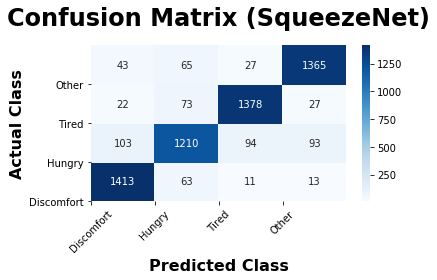

In [14]:
ax = sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
ax.invert_yaxis()
plt.title("Confusion Matrix (SqueezeNet)", pad=20, fontsize=24, fontweight="bold")
plt.xlabel("Predicted Class", fontsize=16, fontweight="bold")
plt.ylabel("Actual Class", fontsize=16, fontweight="bold")
plt.xticks([i for i in range(0, 4, 1)], ['Discomfort', 'Hungry', 
                                         'Tired', 'Other'], rotation=45)
plt.yticks([i for i in range(0, 4, 1)], ['Discomfort', 'Hungry', 
                                         'Tired', 'Other'], rotation="horizontal")
plt.tight_layout()
plt.show()

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

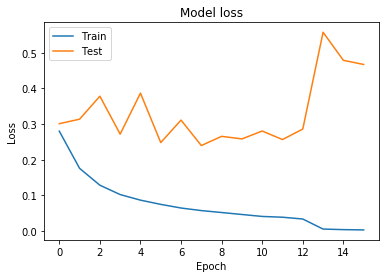

In [6]:
# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

In [28]:
val_path = '../../Data/V3/Test/'
val_batches = ImageDataGenerator().flow_from_directory(val_path, target_size=STANDARD_SIZE, classes=classes_required, batch_size=batch_size_val, shuffle=False)

Found 4000 images belonging to 4 classes.


In [ ]:
val_batches.reset()

In [55]:
#Confution Matrix and Classification Report
Y_pred = model_squeezenet.predict_generator(val_batches, 125,verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print('Accuracy Score')
print(accuracy_score(val_batches.classes, y_pred))
print('Confusion Matrix')
print(confusion_matrix(val_batches.classes, y_pred))
print('Classification Report')
print(classification_report(val_batches.classes, y_pred, target_names=classes_required))

125/125 [==============================] - 7s 58ms/step
Accuracy Score
0.90875
Confusion Matrix
[[908  47  30  15]
 [ 34 822  93  51]
 [  8  29 948  15]
 [  8  17  18 957]]
Classification Report
              precision    recall  f1-score   support

  discomfort       0.95      0.91      0.93      1000
      hungry       0.90      0.82      0.86      1000
       tired       0.87      0.95      0.91      1000
       other       0.92      0.96      0.94      1000

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



In [ ]:
y_pred = model_squeezenet.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [7]:
loss, acc = model_squeezenet.evaluate_generator(val_batches, steps=500)

In [8]:
acc

0.7477443608723786